In [56]:
# -*- coding: utf-8 -*-
%pylab inline

import pandas as pd

def normalize(d, method):
    nd = d[:]
    m = method(nd)
    for i in range(len(nd)):
        nd[i] /= float(m)
    return nd

data = [0, 27, 103, 536, 1537, 3281, 4992, 6293, 6790, 6407, 5406, 3987, 2925, 1904, 1169, 732, 363, 198, 123, 64, 25, 15, 7, 2, 4, 1]
cumul = data[:]

for i in range(len(cumul) - 2, -1, -1):
    cumul[i] += cumul[i+1]
    
print(data)
print(normalize(cumul, max))

Populating the interactive namespace from numpy and matplotlib
[0, 27, 103, 536, 1537, 3281, 4992, 6293, 6790, 6407, 5406, 3987, 2925, 1904, 1169, 732, 363, 198, 123, 64, 25, 15, 7, 2, 4, 1]
[1.0, 1.0, 0.9994241965409141, 0.9972276129747712, 0.9857968480092129, 0.9530187029493933, 0.8830479196434283, 0.7765882578746455, 0.6423833997995351, 0.49757949286643494, 0.3609434646307394, 0.24565481648930498, 0.1606278390309441, 0.09824913096329786, 0.05764432407071719, 0.03271416689769892, 0.017103495340257194, 0.009362137723656992, 0.005139579023693246, 0.002516474376746071, 0.0011516069181719307, 0.0006184555671664072, 0.0002985647565630931, 0.00014928237828154656, 0.0001066302702011047, 2.132605404022094e-05]


In [57]:
# resolution
res = 50
N = 0

xlabel = ""
ylabel = "Taux de reussite"
title = ''
label_size = 20
xticks_size = 20
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    


font = {'family' : 'normal',
#    'weight' : 'normal',
    'size'   : 18}

matplotlib.rc('font', **font)
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)


In [70]:
def init_plot(ax, d, xlab, ylab):
    plt.figure(figsize=(30,20))

    pos = np.arange(len(d))
    width = 1.0     # gives histogram aspect to the bar diagram

    ax = plt.axes()
    ax.set_xticks(pos + (width / 2))
    ax.set_xticklabels(pos)



    ind = [0,5,10,15,20,25]
    plt.xticks(ind, ind)

    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title("")

    # Remove the plot frame lines. They are unnecessary chartjunk.  
    ax = plt.subplot(111)  
    ax.spines["top"].set_visible(False)  
    ax.spines["bottom"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False)

    ax.tick_params(axis=u'both', which=u'both',length=0)
    
def show_data_bar(ax, d, xlab, ylab):
    init_plot(ax, d, xlab, ylab)
    print(d)
    
    plt.bar(pos, d, width, color=tableau20[18], edgecolor=tableau20[18], alpha=1)
    plt.show()
    
def show_data_line(ax, d, xlab, ylab):
    init_plot(ax, d, xlab, ylab)
    print(d)
    
    plt.plot(pos, d, color=tableau20[18], linewidth = 3, alpha=1)
    plt.show()


[0.0, 0.0005758034590859654, 0.0021965835661427566, 0.011430764965558423, 0.03277814505981958, 0.0699707833059649, 0.10645966176878292, 0.13420485807511037, 0.14480390693310016, 0.13663602823569554, 0.11528864814143439, 0.08502697745836088, 0.06237870806764624, 0.04060480689258066, 0.024930157173018275, 0.015610671557441726, 0.0077413576166002005, 0.004222558699963745, 0.0026231046469471753, 0.0013648674585741401, 0.0005331513510055234, 0.00031989081060331405, 0.00014928237828154656, 4.265210808044188e-05, 8.530421616088376e-05, 2.132605404022094e-05]


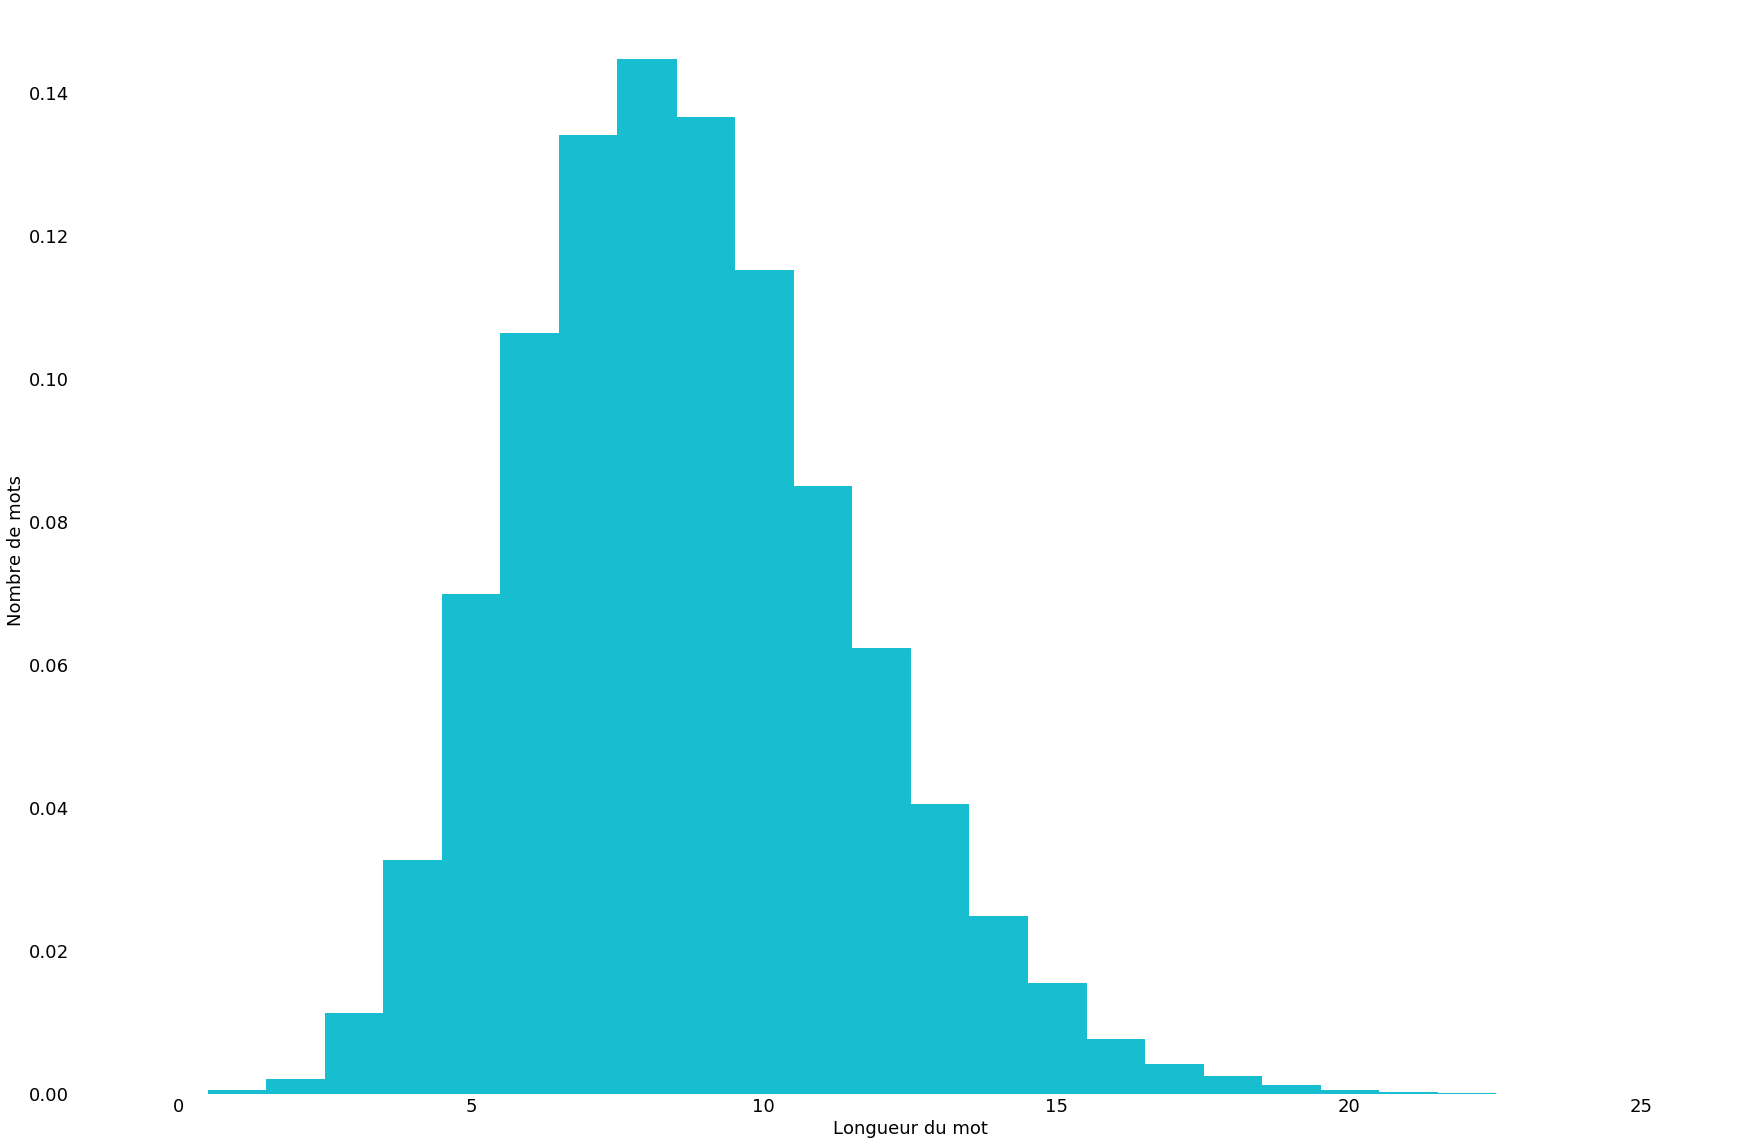

In [71]:
show_data_bar(ax, normalize(data, sum), "Longueur du mot", "Nombre de mots")

[1.0, 1.0, 0.9994241965409141, 0.9972276129747712, 0.9857968480092129, 0.9530187029493933, 0.8830479196434283, 0.7765882578746455, 0.6423833997995351, 0.49757949286643494, 0.3609434646307394, 0.24565481648930498, 0.1606278390309441, 0.09824913096329786, 0.05764432407071719, 0.03271416689769892, 0.017103495340257194, 0.009362137723656992, 0.005139579023693246, 0.002516474376746071, 0.0011516069181719307, 0.0006184555671664072, 0.0002985647565630931, 0.00014928237828154656, 0.0001066302702011047, 2.132605404022094e-05]


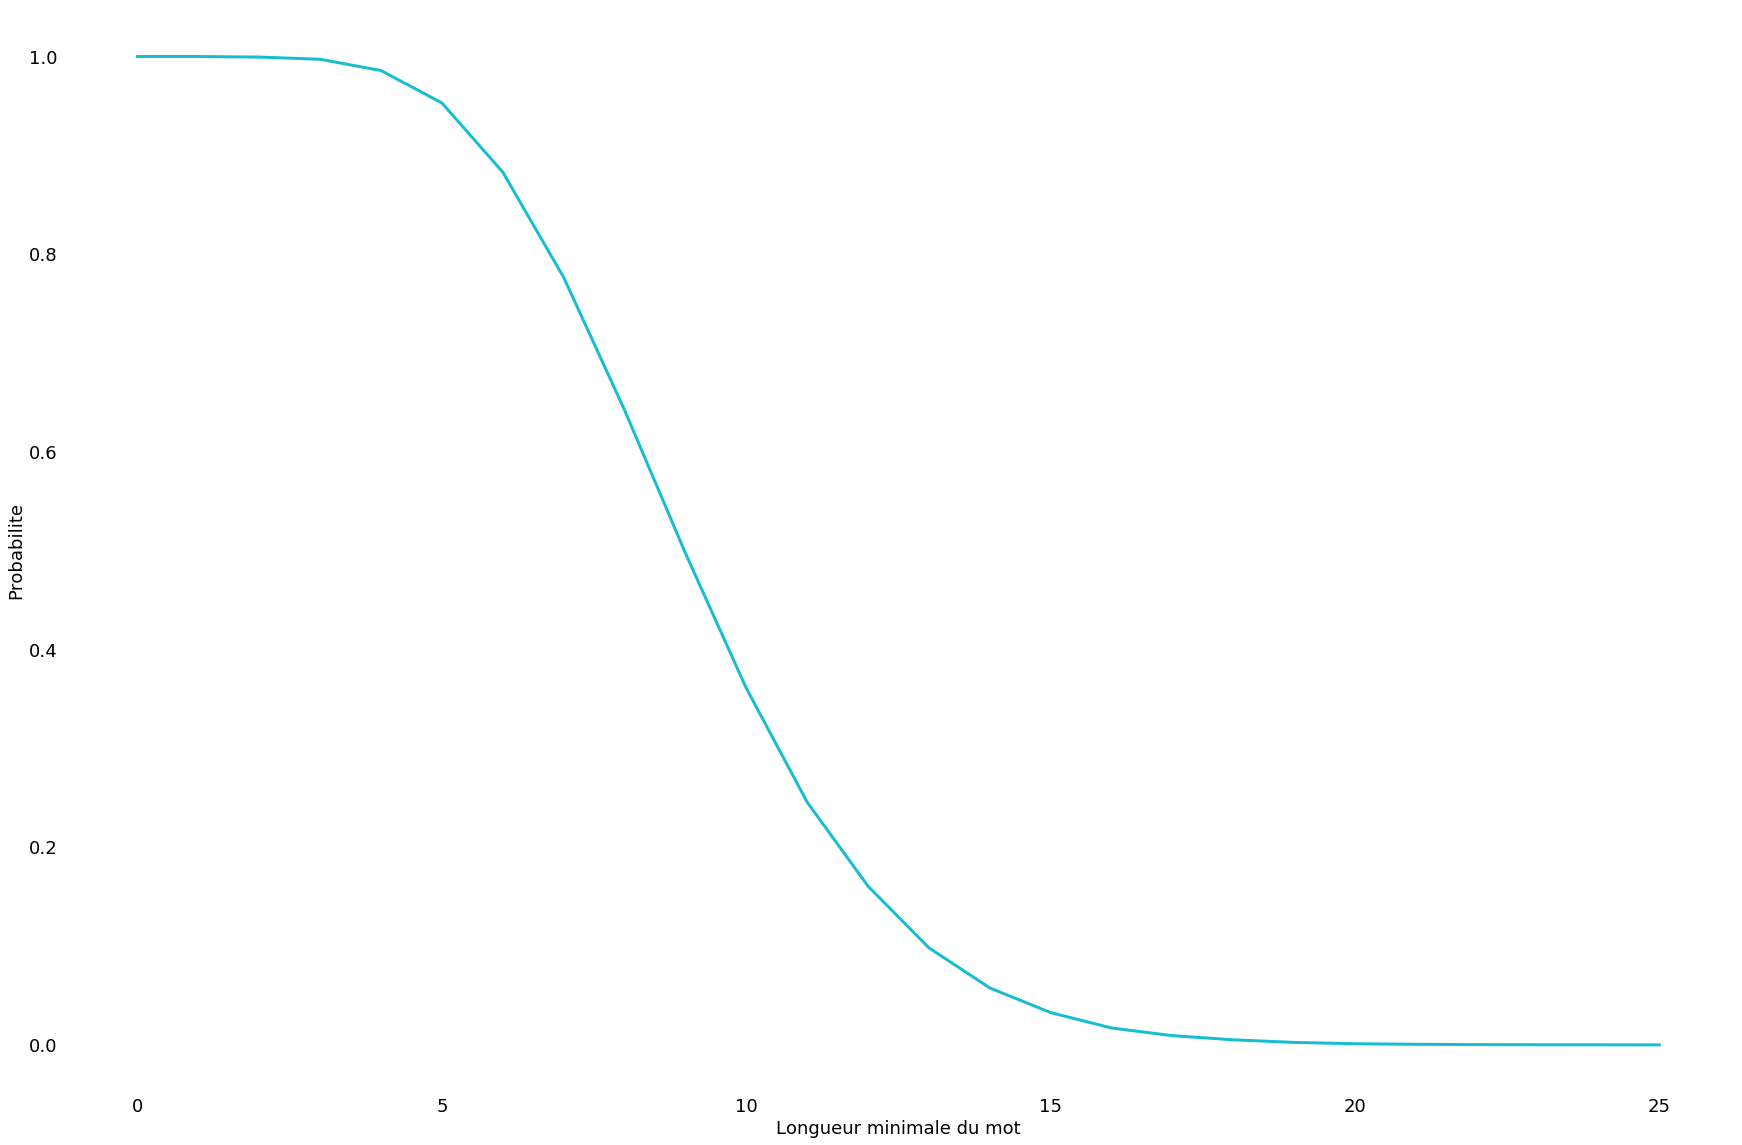

In [72]:
show_data_line(ax, normalize(cumul, max), "Longueur minimale du mot", "Probabilite")